test2
andrew y ernesto

In [232]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("testing")

testing


In [233]:
dataset = pd.read_excel("Data_Train.xlsx")
#print(dataset.describe(include='all'))
print(dataset.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [234]:
# Función que convierte los datos no numéricos de
# la propiedad "Total_Stops" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_stops(data):
    if type(data) == float: # De ser un dato vacío,
        data = 0 # Asigna una cantidad de 0 horas.
    elif type(data) != numpy.int64: # De ser el dato un string,
        # inicia el ciclo.
        if data == "non-stop": # Si "non-stop",
            data = 0 # Guarda el número de paradas como 0
        else: # Sino,
            data = int(data[0]) # Guarda el número de paradas que corresponde
            # al primer dígito del dato.
    return data
# Función que convierte los datos no numéricos de
# la propiedad "Duration" en numéricos.
# Entrada: stringDtype; Salida: integer
def uniform_duration(data):
    if data.find("m") == -1: # Dato con formato “#h”
        [horas] = data.split(" ") # Asigna a "horas"
        horas = horas.strip("h") # el número de horas
        minutos = 0 # y a "minutos" 0
    elif data.find("h") == -1: # Dato con formato “#m”
        [minutos] = data.split(" ") # Asigna a "minutos"
        minutos = minutos.strip("m") # el número de minutos
        horas = 0 # y a "horas" 0
    else:
        [horas, minutos] = data.split(" ") # Dato con formato “#h #m”
        minutos = minutos.strip("m") # Extrae las horas y minutos
        horas = horas.strip("h") # y los asigna a la variable apropiada
    # Se suma la cantidad de minutos totales que durará el vuelo
    data = int(horas)*60 + int(minutos)
    return data


In [235]:
# Procesamiento de datos
dataset["Duration"] = dataset["Duration"].apply(lambda x: uniform_duration(x))
dataset["Total_Stops"] = dataset["Total_Stops"].apply(lambda x: uniform_stops(x))
dataset = dataset[["Duration", "Total_Stops","Price"]]
# Normalizado
max_val = dataset.max(axis=0) # Se obtiene el máximo de cada columna
min_val = dataset.min(axis=0) # Se obtiene el mínimo de cada columna
range = max_val - min_val # Se obtiene la diferencia de los dos
dataset = (dataset - min_val)/(range) # Y se utiliza para normalizarlas
dataset = dataset.astype(float) # Se asegura que los datos sean tipo float
print(dataset)

       Duration  Total_Stops     Price
0      0.057793         0.00  0.027497
1      0.154116         0.50  0.075920
2      0.397548         0.50  0.155917
3      0.112084         0.25  0.057348
4      0.098074         0.25  0.148457
...         ...          ...       ...
10678  0.050788         0.00  0.030198
10679  0.052539         0.00  0.030687
10680  0.061296         0.00  0.070351
10681  0.054291         0.00  0.140046
10682  0.173380         0.50  0.128535

[10683 rows x 3 columns]


In [236]:
train_percentage=0.7
# Distribución de los datos
trainset = dataset.sample(frac=train_percentage) # Se extraen datos
# para el entrenamiento
testset = dataset.drop(trainset.index) # Y se le quitan esos mismos
# al dataset para crear los datos de prueba
print(trainset)
print(testset)

       Duration  Total_Stops     Price
1028   0.353765         0.25  0.143261
7755   0.150613         0.25  0.149422
8021   0.052539         0.00  0.039162
8256   0.416813         0.50  0.114684
6637   0.056042         0.00  0.036950
...         ...          ...       ...
8486   0.103327         0.25  0.166617
10456  1.000000         0.50  0.243528
7441   0.352014         0.25  0.143261
9557   0.124343         0.25  0.109359
341    0.161121         0.25  0.064769

[7478 rows x 3 columns]
       Duration  Total_Stops     Price
0      0.057793         0.00  0.027497
3      0.112084         0.25  0.057348
8      0.534151         0.25  0.119970
9      0.162872         0.25  0.088305
10     0.276708         0.25  0.091932
...         ...          ...       ...
10664  0.059545         0.00  0.039407
10665  0.050788         0.00  0.039162
10666  0.518389         0.25  0.109359
10671  0.026270         0.00  0.017247
10672  0.416813         0.50  0.120780

[3205 rows x 3 columns]


In [237]:
network = tf.keras.models.Sequential()
# Declaración de la capa de entrada
network.add(tf.keras.layers.Dense(
units=5,
input_shape=(2,)))
# Ciclo de capas de neuronas intermedias
i = 0
while i < 2-1:
    network.add(tf.keras.layers.Dense(
    units=5,
    activation="relu"))
    i += 1
    # Declaración de la capa de salida
    network.add(tf.keras.layers.Dense(
    units=1,
    activation="sigmoid"))

In [238]:
network.compile(
optimizer="adam",
loss="mse")

In [239]:
losses = network.fit(x=trainset[["Duration", "Total_Stops"]],
y=trainset['Price'],
validation_data=(
testset[["Duration", "Total_Stops"]],
testset['Price']),
batch_size=300,
epochs=40
)

Epoch 1/40
25/25 [==============================] - 1s 9ms/step - loss: 0.1751 - val_loss: 0.1650
Epoch 2/40
25/25 [==============================] - 0s 4ms/step - loss: 0.1545 - val_loss: 0.1408
Epoch 3/40
25/25 [==============================] - 0s 3ms/step - loss: 0.1281 - val_loss: 0.1127
Epoch 4/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0998 - val_loss: 0.0847
Epoch 5/40
25/25 [==============================] - 0s 4ms/step - loss: 0.0730 - val_loss: 0.0600
Epoch 6/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0508 - val_loss: 0.0407
Epoch 7/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.0273
Epoch 8/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.0188
Epoch 9/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.0136
Epoch 10/40
25/25 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0105
Epoch 11/40
25/25 [

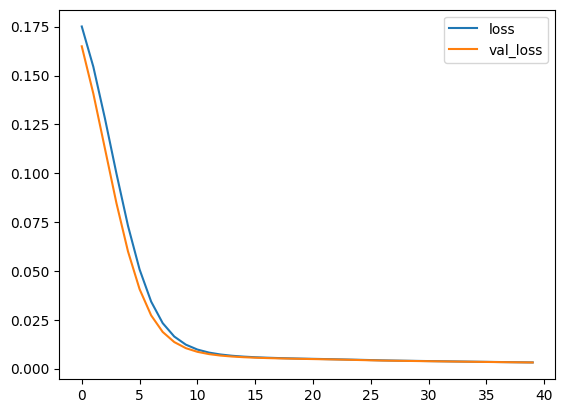

In [240]:
# Se extrae el historial de error contra iteraciones de la clase
loss_df = pd.DataFrame(losses.history)
# Se grafica
loss_df.loc[:, ['loss', 'val_loss']].plot()
# Y se pide que se muestre la ventana en que se graficó
plt.show()

In [241]:
# Se eligen 10 datos al azar
dato = dataset.sample(frac=10/dataset.shape[0])
datoPrueba = dato.drop(columns=["Price"])
# Y se predice el precio que tendría, luego de
# revertir la normalización
precio = network.predict(datoPrueba)
print("Dato ingresado:")
print(dato*range+ min_val) # Se normalizan los datos
dato["Price"] = precio
print("Estimación: ")
print(dato*range+ min_val)

1/1 [==============================] - 0s 84ms/step
Dato ingresado:
      Duration  Total_Stops    Price
8337     365.0          1.0   6276.0
3206     310.0          1.0   6493.0
758      810.0          2.0  10368.0
4576     135.0          0.0   3687.0
8304     455.0          1.0   6723.0
143      515.0          1.0   6442.0
8068    1310.0          1.0  11087.0
1299     635.0          1.0   6442.0
9155     690.0          1.0  10877.0
3528     325.0          1.0   7164.0
Estimación: 
      Duration  Total_Stops         Price
8337     365.0          1.0   9296.680214
3206     310.0          1.0   9255.769117
758      810.0          2.0   9841.818958
4576     135.0          0.0   8939.017312
8304     455.0          1.0   9364.060337
143      515.0          1.0   9409.277409
8068    1310.0          1.0  10075.905678
1299     635.0          1.0   9500.428732
9155     690.0          1.0   9545.662604
3528     325.0          1.0   9266.909152


In [242]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(network)

AttributeError: module 'keras.layers' has no attribute 'core'